In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Question 6:

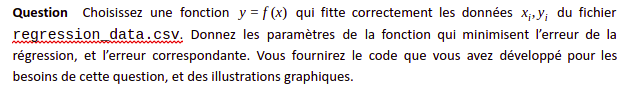

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.fft as fft

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/regression_data.csv')



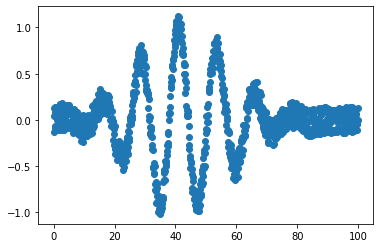

In [24]:
plt.scatter(df['x'], df[' y'])


The MSE between the real function and the fit = 0.01


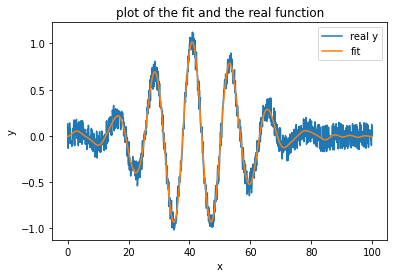

In [42]:
def coeff_fourrier(k): 
    c = df[" y"].values*np.exp(-1j*2*k*np.pi*df.x.values/df.x.values[-1]) 
    return(c.sum()/c.size)


def f(x, n):
    sig = np.array([2*coeff_fourrier(i)*np.exp(1j*2*i*np.pi*x/df.x.values[-1]) for i in range(1, n+1)])
    return(sig.sum()) 

y_fit = np.array([f(x, 20).real for x in df.x.values])


print(f"\nThe MSE between the real function and the fit = {round(((y_fit-df[' y'].values)**2).sum()/len(df[' y'].values),2)}")


plt.plot(df.x.values, df[' y']) 
plt.plot(df.x.values, y_fit)
plt.legend(["real y", "fit"])
plt.title("plot of the fit and the real function")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Question 7
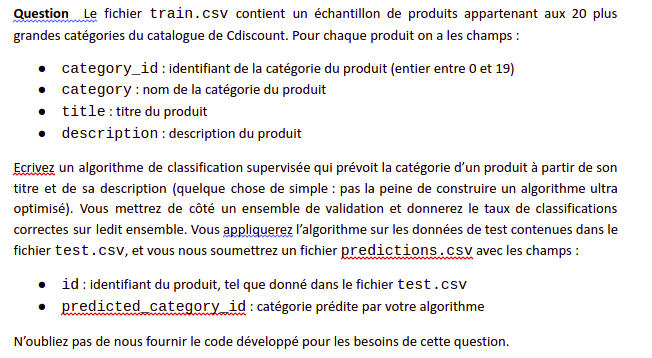

In [21]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cdiscount_train.csv', encoding = "ISO-8859-1")
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cdiscount_test.csv',encoding = "ISO-8859-1")

#### on choisit d'entrainer un modèle de classification sur le texte résultant de la combinaison du titre et de la description

In [11]:
df_train["text"] = df_train["title"]+" . "+df_train["description"]
df_test["text"] = df_test["title"]+" . "+df_test["description"]


In [12]:
df_train.head()

category_id  ...                                               text
0            0  ...  Coque  Samsung ACE S5830 Cassette audio transp...
1            0  ...  Coque rigide Violette pour NOKIA LUMIA 625 mot...
2            0  ...  Coque rigide Rose bonbon pour HUAWEI ASCEND P2...
3            0  ...  Coque souple Grise pour SONY XPERIA Z1 motif D...
4            0  ...  Coque HTC One S 4,3''  Dessin Tête de Girafe ...

[5 rows x 5 columns]

#### on réalise le prétraitement du texte ainsi que la vectorisation à l'aide de tfidf

In [31]:
stemmer = WordNetLemmatizer()

def clean_text(sen):
    sen = re.sub(r"\W", " ", sen)
    sen = re.sub(r"\s+[a-zA-Z]\s+", " ", sen)
    sen = re.sub(r'\s+', ' ', sen, flags=re.I)
    sen = sen.lower()
    words = sen.split()
    words = [stemmer.lemmatize(word) for word in words]
    sen = " ".join(words)
    return sen

texts = [clean_text(sen) for sen in df_train["text"].values]

tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words=stopwords.words('french'))

X = tfidfconverter.fit_transform(texts).toarray()
y = df_train.category_id.values


#### dans un premier temps on divise notre base de données en base d'entrainement et un autre de test, afin de tester la performance du modèle

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

classifier = RandomForestClassifier(n_estimators=2000, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [33]:
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.98      0.96       193
           1       0.88      0.90      0.89       201
           2       0.98      0.97      0.98       197
           3       0.98      0.98      0.98       182
           4       0.97      0.94      0.96       204
           5       1.00      0.98      0.99       212
           6       1.00      0.99      0.99       206
           7       1.00      0.99      0.99       214
           8       0.99      0.94      0.97       195
           9       1.00      1.00      1.00       190
          10       0.96      0.99      0.98       192
          11       0.99      0.99      0.99       197
          12       0.99      0.98      0.98       206
          13       0.96      0.94      0.95       193
          14       0.98      0.96      0.97       198
          15       0.83      0.90      0.86       210
          16       0.98      0.97      0.97       196
          17       1.00    

#### le modèle généralise très bien, on peut l'entrainer dans ce cas sur la totlalité du dataset df_train

In [34]:
classifier.fit(X, y)

test_texts = [clean_text(sen) for sen in df_test["text"].values]

test_X = tfidfconverter.fit_transform(test_texts).toarray()
y_pred_test = classifier.predict(test_X)

df_test["predicted_category_id"] = y_pred_test
df_test[["id", "predicted_category_id"]].to_csv("predictions.csv")

In [37]:
df_test[["id", "predicted_category_id"]].to_csv("predictions.csv")

#### à l'issue de la dernière cell, on obtient un fichier csv predictions.csv contenant nos prediction 

## Question8

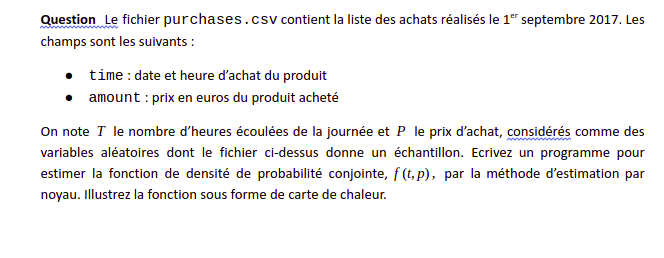

In [9]:
from scipy.stats.kde import gaussian_kde
import numpy as np

In [5]:
purchases = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/purchases.csv')

In [6]:
purchases['T'] = pd.to_datetime(purchases.time).apply(lambda x : x.hour)

In [7]:
hours = purchases['T'].values
amount = purchases['amount'].values
k = gaussian_kde([hours,amount])

### l'idée est d'exprimer la densité de proba sous la forme:
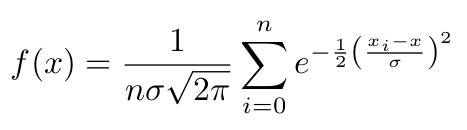

et de choisir la bonne valeur de sigma

In [11]:
nbins=500
hoursi, amounti = np.mgrid[hours.min():hours.max():nbins*1j, amount.min():amount.max():nbins*1j]
zi = k(np.vstack([hoursi.flatten(), amounti.flatten()]))

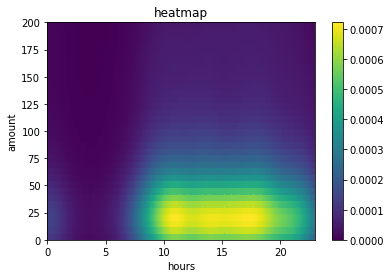

In [13]:
plt.pcolormesh(hoursi, amounti, zi.reshape(hoursi.shape))
plt.colorbar()
plt.ylim(0, 200)
plt.title("heatmap")
plt.xlabel("hours")
plt.ylabel("amount")
plt.show()